In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# http://www.eecs.qmul.ac.uk/~phao/IP/Images/


In [5]:

# 整张图 DCT 变换
def whole_img_dct(img_f32):
    img_dct = cv2.dct(img_f32)            # 进行离散余弦变换
    img_dct_log = np.log(abs(img_dct))    # 进行log处理
    img_idct = cv2.idct(img_dct)          # 进行离散余弦反变换
    return img_dct_log, img_idct

# 分块图 DCT 变换
def block_img_dct(img_f32):
    height,width = img_f32.shape[:2]
    block_y = height // 8
    block_x = width // 8
    height_ = block_y * 8
    width_ = block_x * 8
    img_f32_cut = img_f32[:height_, :width_]
    img_dct = np.zeros((height_, width_), dtype=np.float32)
    new_img = img_dct.copy()
    for h in range(block_y):
        for w in range(block_x):
            # 对图像块进行dct变换
            img_block = img_f32_cut[8*h: 8*(h+1), 8*w: 8*(w+1)]
            img_dct[8*h: 8*(h+1), 8*w: 8*(w+1)] = cv2.dct(img_block)

            # 进行 idct 反变换
            dct_block = img_dct[8*h: 8*(h+1), 8*w: 8*(w+1)]
            img_block = cv2.idct(dct_block)
            new_img[8*h: 8*(h+1), 8*w: 8*(w+1)] = img_block
    img_dct_log2 = np.log(abs(img_dct))
    return img_dct_log2, new_img

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3460\1507941294.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_f32 = img_u8.astype(np.float)  # 数据类型转换 转换为浮点型
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3460\4020713256.py:28: RuntimeWarning: divide by zero encountered in log
  img_dct_log2 = np.log(abs(img_dct))


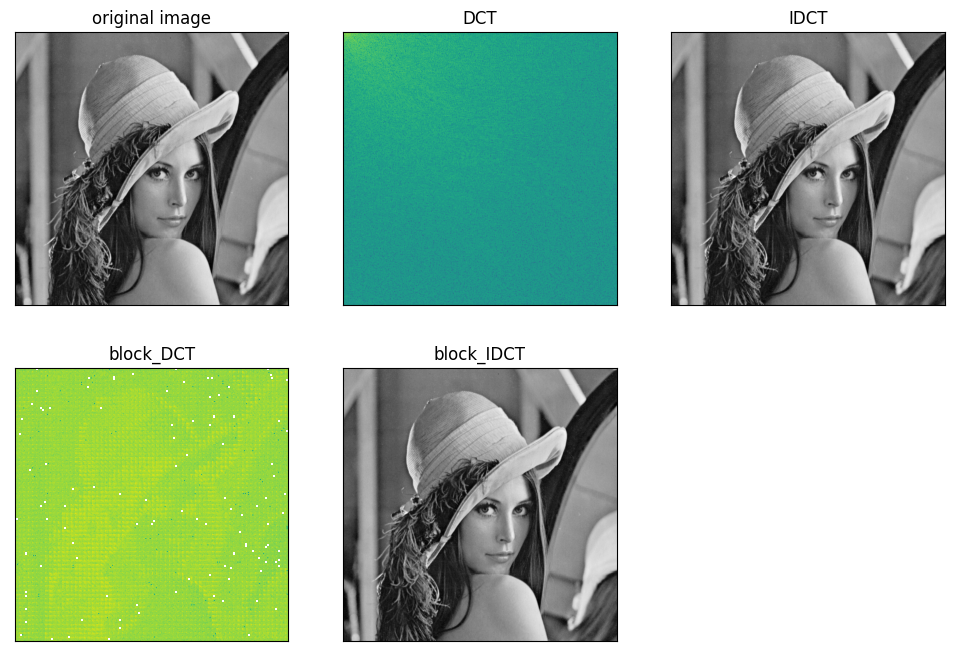

In [6]:

img_u8 = cv2.imread("Lena.bmp", 0)
img_f32 = img_u8.astype(np.float)  # 数据类型转换 转换为浮点型
img_dct_log, img_idct = whole_img_dct(img_f32)
img_dct_log2, new_img = block_img_dct(img_f32.copy())

plt.figure(6, figsize=(12, 8))
plt.subplot(231)
plt.imshow(img_u8, 'gray')
plt.title('original image'), plt.xticks([]), plt.yticks([])
plt.subplot(232)
plt.imshow(img_dct_log)
plt.title('DCT'), plt.xticks([]), plt.yticks([])
plt.subplot(233)
plt.imshow(img_idct, 'gray')
plt.title('IDCT'), plt.xticks([]), plt.yticks([])
plt.subplot(234)
plt.imshow(img_dct_log2)
plt.title('block_DCT'), plt.xticks([]), plt.yticks([])
plt.subplot(235)
plt.imshow(new_img, 'gray')
plt.title('block_IDCT'), plt.xticks([]), plt.yticks([])
plt.show()